# Exploring the data

In [1]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from sys import path
from os.path import abspath

path.insert(0, abspath('../src'))
import mylib.cleaning as clean
import mylib.exploring as explore

In [4]:
pd.options.display.max_columns = None

#### Load config

In [5]:
with open('../params.yaml') as file:
    config = yaml.safe_load(file)

#### Read cleaned dataset

In [6]:
data = pd.read_csv(config['data']['clean'])
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfied
0,70172,M,Loyal,13,Private,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,False
1,5047,M,Disloyal,25,Business,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,False
2,110028,F,Loyal,26,Business,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,True
3,24026,F,Loyal,25,Business,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,False
4,119299,M,Loyal,61,Business,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,True


#### Select all columns containing a rating (0-5)

In [7]:
rate_cols = ['inflight_wifi_service', 'departure_arrival_time_convenient',
             'ease_of_online_booking', 'gate_location', 'food_and_drink',
             'online_boarding', 'seat_comfort', 'inflight_entertainment',
             'on_board_service', 'leg_room_service', 'baggage_handling',
             'checkin_service', 'inflight_service', 'cleanliness']

### Prepare dataset for exploration
Before deeper exploring the dataset, let's add some useful columns...

#### Create column 'rating_sum' with the sum of all ratings of a certain passenger

In [8]:
data['rating_avg'] = data[rate_cols].mean(axis=1)

#### Create column 'flight_distance_class' from column 'flight_distance'
<pre>
  0-1000km    => 'short'
  1000-3000km => 'medium'
  >3000km     => 'long'
</pre>

In [9]:
def get_flight_distance_class(val):
    if val < 1000:
        return "short"
    elif val < 3000:
        return "medium"
    else:
        return "long"

In [10]:
data['flight_distance_class'] = data['flight_distance'].apply(get_flight_distance_class)

#### Create column 'generation' from column 'age'
<pre>
  <13 years   => 'Kid'
  13-19 years => 'Teenager'
  20-64 years => 'Adult'
  >64 years   => 'Retiree'
</pre>

In [11]:
def get_generation(val):
    if val < 13:
        return "Kid"
    elif val < 20:
        return "Teenager"
    elif val < 65:
        return "Adult"
    else:
        return "Retiree"

In [12]:
data['generation'] = data['age'].apply(get_generation)

In [13]:
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfied,rating_avg,flight_distance_class,generation
0,70172,M,Loyal,13,Private,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,False,3.857143,short,Teenager
1,5047,M,Disloyal,25,Business,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,False,2.285714,short,Adult
2,110028,F,Loyal,26,Business,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,True,3.714286,medium,Adult
3,24026,F,Loyal,25,Business,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,False,3.000000,short,Adult
4,119299,M,Loyal,61,Business,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,True,3.500000,short,Adult


#### Store exploration set to file

In [14]:
data.to_csv(config['data']['explore'], index=False)

#### Get unique categorical values

In [15]:
explore.print_unique(data, True)

COLUMN gender (object)
['M' 'F']

COLUMN customer_type (object)
['Loyal' 'Disloyal']

COLUMN type_of_travel (object)
['Private' 'Business']

COLUMN class (object)
['Eco Plus' 'Business' 'Eco']

COLUMN flight_distance_class (object)
['short' 'medium' 'long']

COLUMN generation (object)
['Teenager' 'Adult' 'Kid' 'Retiree']



#### Explore distribution of categoricals

In [16]:
def plot_amount(data, h, w, fig_h=5, fig_w=5, hue=None):
    fig,ax = plt.subplots(h,w, figsize=(fig_w, fig_h))
    coli=0

    for y in range(h):
        for x in range(w):
            sx = sns.countplot(x=data[data.columns[coli]], ax=ax[y,x], hue=hue)
            sx.set(ylabel='', xlabel='', title=data.columns[coli])
            coli += 1

    plt.tight_layout()
    plt.savefig('../plots/categorical_distribution.png', dpi=300)
    plt.show()

In [17]:
sns.set_style("whitegrid", {"grid.color": ".5", "grid.linestyle": ":"})

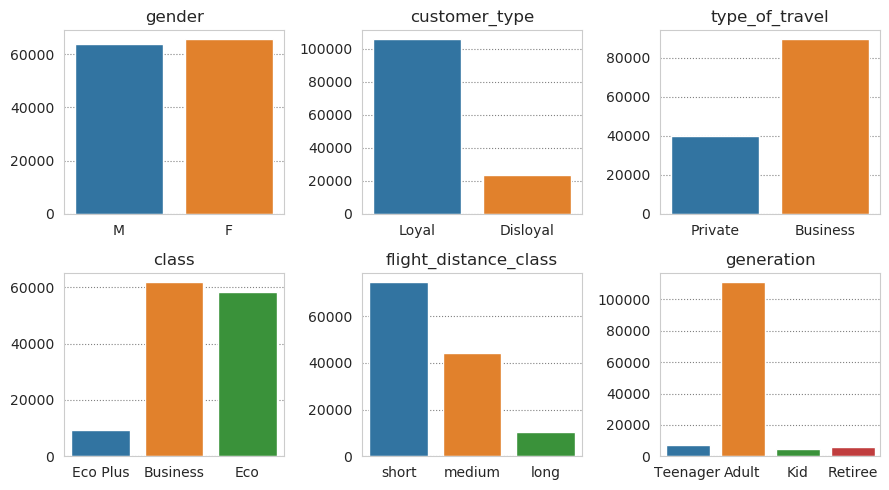

In [18]:
plot_amount(data.select_dtypes(object), 2, 3, 5, 9)

<br>

#### Explore passenger age

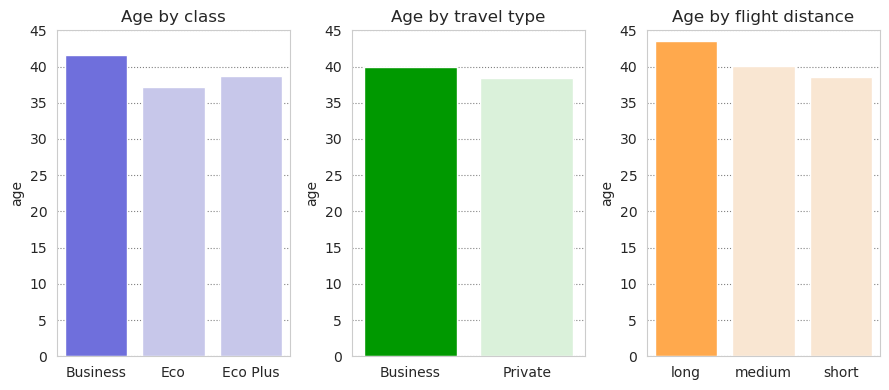

In [19]:
fig,ax = plt.subplots(1, 3, figsize=(9,4))

grp = data.pivot_table(index='class', values='age').reset_index()
sx  = sns.barplot(y=grp['age'], x=grp['class'], ax=ax[0], color='#c1c1f0')
sx.set(title='Age by class', xlabel='', ylim=(0,45))
sx.patches[0].set_facecolor('#6f6fdc')

grp = data.pivot_table(index='type_of_travel', values='age').reset_index()
sx  =sns.barplot(y=grp['age'], x=grp['type_of_travel'], ax=ax[1], color='#d6f5d6')
sx.set(title='Age by travel type', xlabel='', ylim=(0,45))
sx.patches[0].set_facecolor('#009900')

grp = data.pivot_table(index='flight_distance_class', values='age').reset_index()
sx  = sns.barplot(y=grp['age'], x=grp['flight_distance_class'], ax=ax[2], color='#ffe6cc')
sx.set(title='Age by flight distance', xlabel='', ylim=(0,45))
sx.patches[0].set_facecolor('#ffa94d')

plt.tight_layout()
plt.savefig('../plots/age.png', dpi=300)
plt.show()

- Passengers within the business class are oldest.
- Private travelers are younger than business travelers.
- Passengers on long distance flights are older than on short or medium distance flights.

<br>

#### Flight class by type of travel

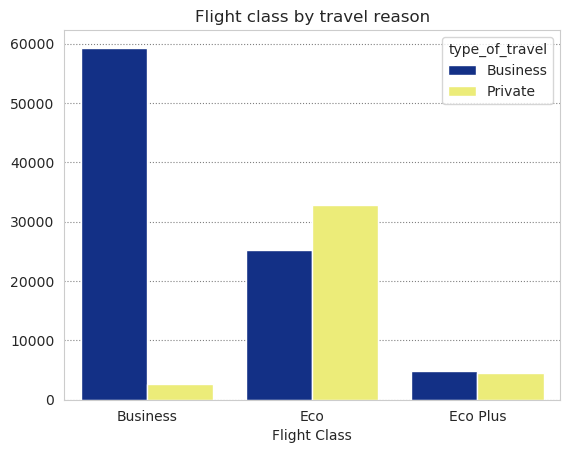

In [20]:
grp = data.groupby(['type_of_travel', 'class']).agg({'class':'count'}).rename(columns={'class':'count'}).reset_index()
busi = grp[grp['type_of_travel']=='Business']
sx = sns.barplot(data=grp, x='class', y='count', hue='type_of_travel', palette=['#002699','#ffff66'])
sx.set(title='Flight class by travel reason', xlabel='Flight Class', ylabel='')
plt.savefig('../plots/class_by_travel_type.png', dpi=300)
plt.show()

- Most customers are business travelers
- Most business travelers are using the business class
- Economy class is largely used by private travelers
- In Economy Plus class the ratio of business and private passengers is almost balanced

<br>

#### Get the overall rating in average

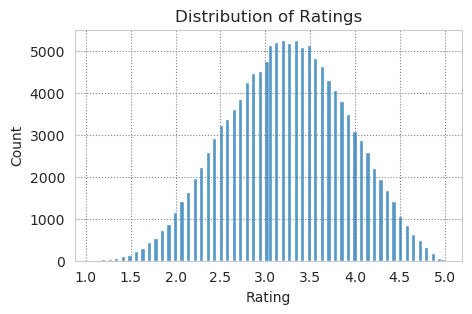

In [21]:
fig,ax = plt.subplots(figsize=(5,3))
sns.histplot(data['rating_avg'], ax=ax).set(title='Distribution of Ratings', xlabel='Rating')
plt.show()

Nice, the ratings follow a normal distribution with an average of ...

In [22]:
print(f"Average rating: {round(data['rating_avg'].mean(),2)}")

Average rating: 3.24


<br>

#### Show rating by flight class

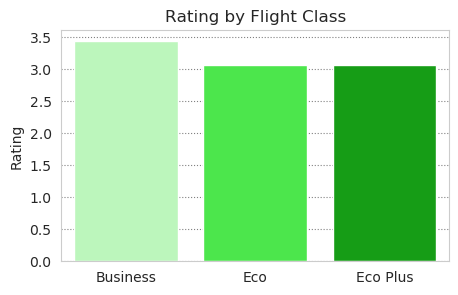

In [23]:
grp = data.pivot_table(index='class', values='rating_avg').reset_index()
fig,ax = plt.subplots(figsize=(5,3))
sx = sns.barplot(data=grp, y='rating_avg', x='class', palette=['#b3ffb3', '#33ff33', '#00b300'], ax=ax)
sx.set(title='Rating by Flight Class', xlabel='', ylabel='Rating')
plt.savefig('../plots/rating_by_class.png', dpi=300)
plt.show()

Apparently passengers booked the business class are gving better ratings.

<br>

#### Show rating by age

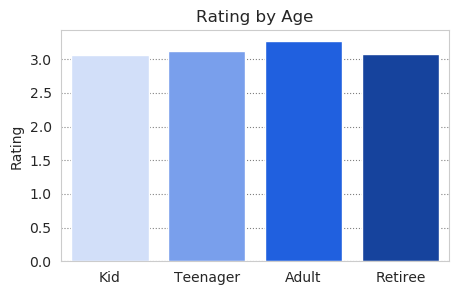

In [24]:
grp = data.pivot_table(index='generation', values='rating_avg').reset_index()
fig,ax = plt.subplots(figsize=(5,3))
sx = sns.barplot(data=grp, y='rating_avg', x='generation', ax=ax,
                 palette=['#ccddff', '#6699ff', '#0055ff', '#003cb3'],
                 order=['Kid', 'Teenager', 'Adult', 'Retiree'])
sx.set(title='Rating by Age', xlabel='', ylabel='Rating')
plt.savefig('../plots/rating_by_age.png', dpi=300)
plt.show()

Adult passengers (21-64 years) are rating best.

<br>

#### How does the age effect the rating

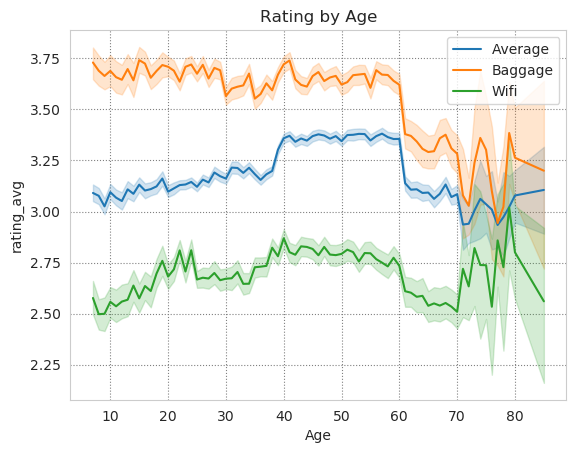

In [25]:
sx = sns.lineplot(x=data['age'], y=data['rating_avg'], legend='brief', label='Average')
sx = sns.lineplot(x=data['age'], y=data['baggage_handling'], legend='brief', label='Baggage')
sx = sns.lineplot(x=data['age'], y=data['inflight_wifi_service'], legend='brief', label='Wifi')
sx.set(title='Rating by Age', xlabel='Age')
plt.savefig('../plots/different_rating_by_age.png', dpi=300)
plt.show()

- Passengers from 40 to 60 years give the best ratings.
- From an age of 60 the ratings get worse.

<br>

#### Show rating by flight distance

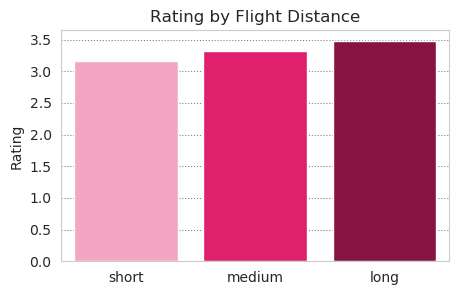

In [26]:
grp = data.pivot_table(index='flight_distance_class', values='rating_avg').reset_index()
fig,ax = plt.subplots(figsize=(5,3))
sx = sns.barplot(data=grp, y='rating_avg', x='flight_distance_class',
                 palette=['#ff99c2', '#ff0066', '#99003d'],
                 order=['short', 'medium', 'long'], ax=ax)
sx.set(title='Rating by Flight Distance', xlabel='', ylabel='Rating')
plt.savefig('../plots/rating_by_distance.png', dpi=300)
plt.show()

On long flights (>= 3000km) passenger seem to be more satisfied with our service.

<br>

#### Show rating by travel type

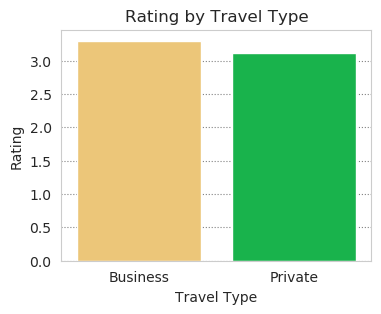

In [27]:
grp = data.pivot_table(index='type_of_travel', values='rating_avg').reset_index()
fig,ax = plt.subplots(figsize=(4,3))
sx = sns.barplot(x=grp['type_of_travel'], y=grp['rating_avg'], palette=['#ffcc66', '#00cc44'], ax=ax)
sx.set(title='Rating by Travel Type', ylabel='Rating', xlabel='Travel Type')
plt.savefig('../plots/rating_by_travel_type.png', dpi=300)
plt.show()

Passengers from the business class have given better ratings.

<br>

#### Show rating by customer type

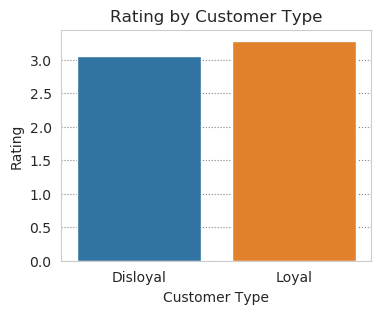

In [28]:
grp = data.pivot_table(index='customer_type', values='rating_avg').reset_index()
fig,ax = plt.subplots(figsize=(4,3))
sx = sns.barplot(x=grp['customer_type'], y=grp['rating_avg'], ax=ax)
sx.set(title='Rating by Customer Type', ylabel='Rating', xlabel='Customer Type')
plt.savefig('../plots/rating_by_customer_type.png', dpi=300)
plt.show()

Loyal customers are more satisfied and give a better rating.

<br>

#### Show rating by gender

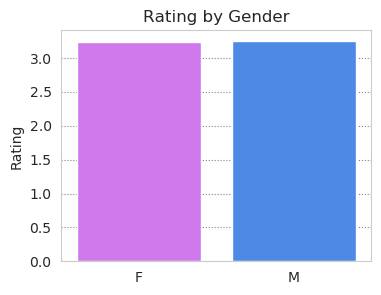

In [29]:
grp = data.pivot_table(index='gender', values='rating_avg').reset_index()
fig,ax = plt.subplots(figsize=(4,3))
sx = sns.barplot(x=grp['gender'], y=grp['rating_avg'], palette=['#d966ff', '#3385ff'], ax=ax)
sx.set(title='Rating by Gender', ylabel='Rating', xlabel='')
plt.savefig('../plots/rating_by_gender.png', dpi=300)
plt.show()

There's no sensible difference between males and females.

<br>

### Which services are rated best/worst ?

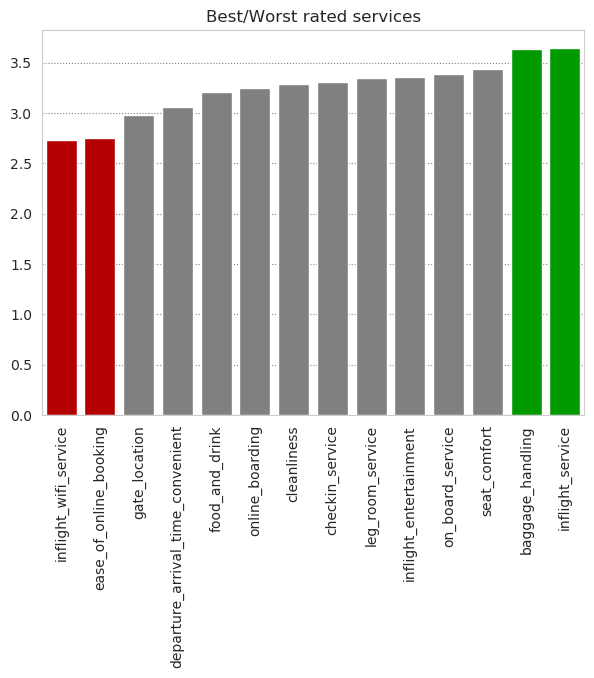

In [30]:
d = {}
for col in rate_cols:
    d[col] = [data[col].mean()]

grp = pd.DataFrame(d).T.sort_values(by=0).T

plt.subplots(figsize=(7,5))
sx = sns.barplot(grp, palette=['grey']*14)
sx.set(title='Best/Worst rated services')

sx.patches[0].set_facecolor('#b30000')
sx.patches[1].set_facecolor('#b30000')

sx.patches[12].set_facecolor('#009900')
sx.patches[13].set_facecolor('#009900')

plt.xticks(rotation=90)
plt.savefig('../plots/best_worst_rated.png', dpi=300)
plt.show()

The best rated services are baggage handling and our inflight service.<br>
We must get better with our inflight wifi service and have to improve the ease of online booking.